In [2]:
# Manipulación de datos
import pandas as pd
import numpy as np
# Para graficar
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_theme(font="Times New Roman",font_scale=1)

# Método Euler - Maruyama

\begin{align*}
    X_{t+dt} &= X_{t} + \mu X_{t}dt + \sigma X_{t}\sqrt{dt}Z
\end{align*}

Donde $Z\sim N(0,1)$

# Método de Milstein
\begin{align*}
    X_{t+dt} &= X_{t} [1 + \sigma \sqrt{dt}Z + (\mu + \frac{1}{2}\sigma^{2}[Z^{2}-1]dt)]
\end{align*}

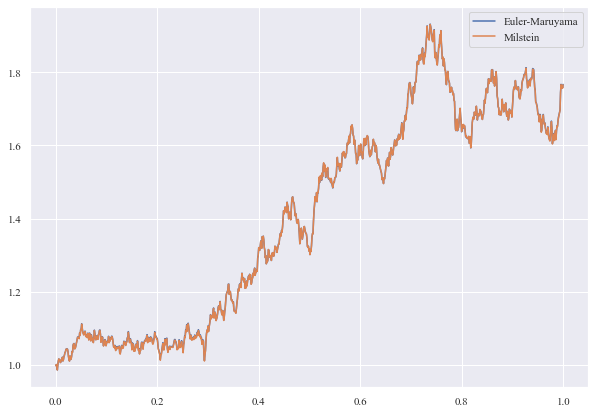

In [31]:
#Parámetros iniciales
alpha, sigma, T, n = 0.7, 0.3, 1, 1000
dt = T/n
Nsim = 2

# Creamos la matriz de trayectorias
X = np.ones((n+1,Nsim))
for j in range(Nsim):
    for i in range(n):
        Z = np.random.randn() # de (6.5)

        # MBE
        # X[i+1,j] = X[i,j] + alpha*dt + sigma*np.sqrt(dt)*Z 

        # Euler -  Maruyama
        X[i+1,0] = X[i,0] * (1 + alpha*dt + sigma * np.sqrt(dt)*Z)

        #Milstein
        X[i+1,1] = X[i,1] * (1 + sigma*np.sqrt(dt)*Z + (alpha + ((1/2)* (sigma**2)*((Z**2)-1)) )*dt)


#Graficamos
tiempo = np.linspace(0,T,n+1)
Esp_X = alpha*tiempo # Valor esperado
Des_Xt = sigma*np.sqrt(tiempo) # Desviación estándar

#Intervalos de confianza
#(\bar{X} - z_{\alpha / 2}\sigma; \bar{X} + z_{\alpha / 2}\sigma) 

fig = plt.figure(figsize=(10,7))
for j in range(Nsim):
    plt.plot(tiempo,X[:,j])
    
plt.legend(["Euler-Maruyama","Milstein"])
# plt.plot(tiempo,Esp_X, c='k')
# plt.plot(tiempo,Esp_X+Des_Xt,c='k')
# plt.plot(tiempo,Esp_X-Des_Xt,c='k')
plt.show()

# b
## Expresión exacta del Movimiento Browniano Geométrico

\begin{align*}
    X_{t+dt} &= X_{t}  e^{(\mu - \frac{\sigma^{2}}{2})dt + \sigma\sqrt{dt}Z}
\end{align*}

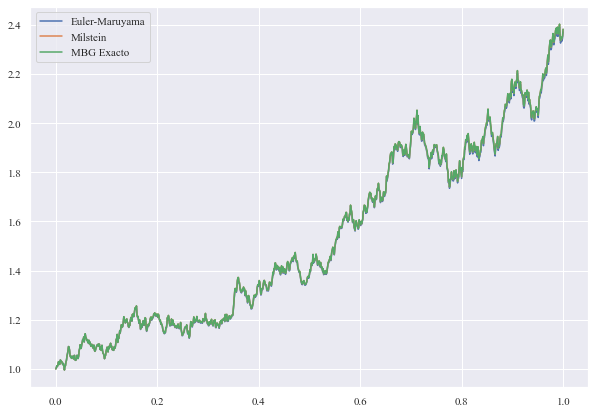

In [37]:
#Parámetros iniciales
alpha, sigma, T, n = 0.7, 0.3, 1, 1000
dt = T/n
Nsim = 3

# Creamos la matriz de trayectorias
X = np.ones((n+1,Nsim))
for j in range(Nsim):
    for i in range(n):
        Z = np.random.randn() # de (6.5)

        # Euler -  Maruyama
        X[i+1,0] = X[i,0] * (1 + alpha*dt + sigma * np.sqrt(dt)*Z)

        #Milstein
        X[i+1,1] = X[i,1] * (1 + sigma*np.sqrt(dt)*Z + (alpha + ((1/2)* (sigma**2)*((Z**2)-1)) )*dt)

        #Expresión exacta del MBG
        X[i+1,2] = X[i,2] *  np.exp((alpha - ((sigma**2)/2))*dt + sigma*np.sqrt(dt)*Z)


#Graficamos
tiempo = np.linspace(0,T,n+1)
Esp_X = alpha*tiempo # Valor esperado
Des_Xt = sigma*np.sqrt(tiempo) # Desviación estándar

#Intervalos de confianza
#(\bar{X} - z_{\alpha / 2}\sigma; \bar{X} + z_{\alpha / 2}\sigma) 

fig = plt.figure(figsize=(10,7))
for j in range(Nsim):
    plt.plot(tiempo,X[:,j])
    
plt.legend(["Euler-Maruyama","Milstein","MBG Exacto"])
# plt.plot(tiempo,Esp_X, c='k')
# plt.plot(tiempo,Esp_X+Des_Xt,c='k')
# plt.plot(tiempo,Esp_X-Des_Xt,c='k')
plt.show()

In [36]:
euler_maruyama = np.mean(X[:,2] - X[:,0])
milstein = np.mean(X[:,1] - X[:,0])
print(f"""
Euler-Maruyama
----------------------------------------------------------------
{euler_maruyama}

----------------------------------------------------------------
Milstein
----------------------------------------------------------------
{milstein}
""")


Euler-Maruyama
----------------------------------------------------------------
-0.0017444684236400884

----------------------------------------------------------------
Milstein
----------------------------------------------------------------
-0.0017192649986281037

